<span style="font-size:110%; text-align:left;"><b><a href="../index.html">3. Gaussian Beams</a> > <a href="./index.html">3. Mirror maps</a></b></span>
<br/><br/>
<span style="font-size:200%; text-align:left;"><b>Preprocessing Phase Maps</b></span>
<br/><br/>
<span style="font-size:110%; text-align:left;">Author: Daniel Töyrä </span>

# Table of Contents
 <p><div class="lev1"><a href="#Introduction"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1"><a href="#Manual-preparation"><span class="toc-item-num">2&nbsp;&nbsp;</span>Manual preparation</a></div><div class="lev2"><a href="#Cropping-the-map"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cropping the map</a></div><div class="lev3"><a href="#Without-specifying-a-cropping-radius"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Without specifying a cropping radius</a></div><div class="lev3"><a href="#With-specifying-a-cropping-radius"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>With specifying a cropping radius</a></div><div class="lev2"><a href="#Centering-the-map"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Centering the map</a></div><div class="lev2"><a href="#Preprocessing-a-phase-map-with-Zernike-polynomials"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Preprocessing a phase map with Zernike-polynomials</a></div><div class="lev3"><a href="#Removing-radius-of-curvature-by-using-the-Z(2,0)-mode"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Removing radius of curvature by using the Z(2,0) mode</a></div><div class="lev3"><a href="#Removing-astigmatism-using-Zernike-polynomials"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Removing astigmatism using Zernike-polynomials</a></div><div class="lev3"><a href="#Removing-both-defocus-and-astigmatism"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Removing both defocus and astigmatism</a></div><div class="lev3"><a href="#Removing-z-offset"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Removing z-offset</a></div><div class="lev3"><a href="#Removing-tilts"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Removing tilts</a></div><div class="lev2"><a href="#Processing-map-by-fitting-surfaces"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Processing map by fitting surfaces</a></div><div class="lev3"><a href="#Without-weighting"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Without weighting</a></div><div class="lev4"><a href="#Removing-curvature"><span class="toc-item-num">2.4.1.1&nbsp;&nbsp;</span>Removing curvature</a></div><div class="lev4"><a href="#Removing-z-offset"><span class="toc-item-num">2.4.1.2&nbsp;&nbsp;</span>Removing z-offset</a></div><div class="lev4"><a href="#Removing-tilts"><span class="toc-item-num">2.4.1.3&nbsp;&nbsp;</span>Removing tilts</a></div><div class="lev3"><a href="#With-Gaussian-weights"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>With Gaussian weights</a></div><div class="lev4"><a href="#Removing-sphere"><span class="toc-item-num">2.4.2.1&nbsp;&nbsp;</span>Removing sphere</a></div><div class="lev4"><a href="#Removing-z-offset"><span class="toc-item-num">2.4.2.2&nbsp;&nbsp;</span>Removing z-offset</a></div><div class="lev4"><a href="#Removing-tilts"><span class="toc-item-num">2.4.2.3&nbsp;&nbsp;</span>Removing tilts</a></div><div class="lev1"><a href="#Automatic-preparation"><span class="toc-item-num">3&nbsp;&nbsp;</span>Automatic preparation</a></div><div class="lev2"><a href="#Cropping-the-map"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cropping the map</a></div><div class="lev2"><a href="#Preprocessing-without-weights-(Zernike-polynomials)"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Preprocessing without weights (Zernike-polynomials)</a></div><div class="lev2"><a href="#Preprocessing-with-Gaussian-weights"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Preprocessing with Gaussian weights</a></div><div class="lev1"><a href="#Summary"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary</a></div>

# Introduction

The processing the phase maps before we use them in FINESSE is important to reduce the computational cost. We want to specify the radius of curvature, tilts, and position along the optical axis in FINESSE. For example, using a mirror map with a radius of curvature instead of specifying the radius of curvature in FINESSE will make FINESSE using a computational basis that is far from optimal, thus, many higher order modes need to be taken into account. Therefore, we want to remove the curvatures from the map and instead specify them in FINESSE. Tilts as well as surface offsets along the optical axis can easily be redefined, so those we just want to remove completely from the map. 

** Recommended notebooks before you start:**

We recommend that you have looked through the Mirror Maps notebook that you can find in this folder. The link above only works if you started IPython/Jupyter Notebook in the top directory of this course.

**Reading material and references:**

[1] [C. Bond, D. Brown, A. Freise and K. Strain,
 "Interferometer Techniques for Gravitational-Wave Detection", *Living Reviews in Relativity* **19**, 3 (2010)](https://link.springer.com/article/10.1007/s41114-016-0002-8). - Living review article (more like a book) on laser interferometry in the frequency domain for detecting gravitational waves, and FINESSE.

[2] [A. Freise, D. Brown, and C. Bond, "Finesse, Frequency domain INterferomEter Simulation SoftwarE"](http://www.gwoptics.org/finesse/download/manual.pdf). - FINESSE-manual

[3] [FINESSE syntax reference](http://www.gwoptics.org/finesse/reference/) - Useful online syntax reference for FINESSE. Also available in the Finesse manual [2], but this online version is updated more often.

** After this session you will be able to... **

* Make a mirror map ready for being used in FINESSE

We start by loading PyKat and other Python packages that we need:

In [5]:
import numpy as np                         # Importing numpy
import matplotlib                          # For plotting
import matplotlib.pyplot as plt                   
from pykat import finesse                  # Importing the pykat.finesse package
from pykat.commands import *               # Importing all packages in pykat.commands.
from pykat.optics.maps import *            # Importing maps package
from IPython.display import display, HTML  # Allows us to display HTML.

# Telling the notebook to make plots inline.
%matplotlib inline      
# Initialises the PyKat plotting tool. Change dpi value 
# to change figure sizes on your screen.
pykat.init_pykat_plotting(dpi=90)          

# Manual preparation

In this section we go through step by step the methods that can be used for processing a mirror map. If you just quickly want to know how to prepare a phase map, jump to section 3. We start by reading the map we want to process, in this case a LIGO ETM mirror.

/Users/adf/work/git/pykat/pykat/optics/maps.py:476: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(zmin, zmax)


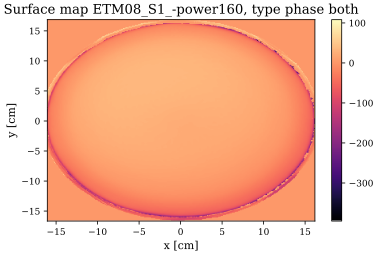

In [6]:
smap = read_map('ETM08_S1_-power160.dat', mapFormat='metroPro')
fig = smap.plot()

## Cropping the map

The cropping is important for removing the rough edge of the raw mirror maps. Here, some large values usually are present, which we want to get rid of to not bias the pre-processing of the map. When cropping you can either specify a radius in meters, and everything further out from the mirror center will be removed. If you do not specify a radius, the distance from the mirror center to the closest NaN-element will be used as radius. For this we use the matrix `surfacemap.notNan`, which is a matrix of booleans keeping track of which elements in the matrix `surfacemap.data` that are not `NaN`. 

### Without specifying a cropping radius 

We can see that there is a rough edge around the mirror map in the figure above. By plotting the field `notNan` field, we can see that there are actually some `NaN` mixed in there as well. 

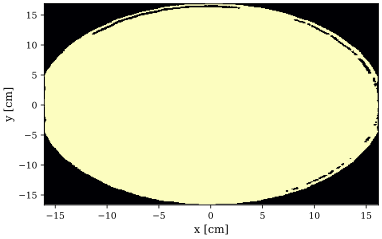

In [7]:
smap1 = deepcopy(smap)

# Plotting the matrix notNan
fig = plt.figure()
pcm = plt.pcolormesh(smap1.x*100, smap1.y*100, smap1.notNan)
pcm.set_rasterized(True)
#cbar = plt.colorbar()
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.show(fig)

Here, 1 is equal to `True` (not `NaN`), and 0 is equal to `False` (`NaN`). So we see that there are some `NaN`-values in the edge. Cropping without specifying a cropping radius to use the matrix `surfacemap.notNan` to crop:

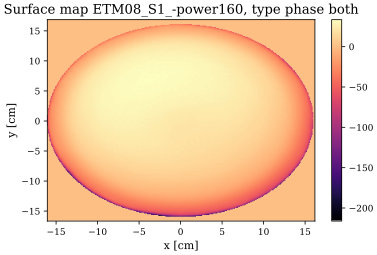

Radius before cropping:  0.16889 m
Radius after cropping:   0.16042 m


In [8]:
# Computing radius (max distance from center to a non-NaN element.)
r0 = smap1.find_radius(method = 'max', unit='meters')

# Cropping
smap1.crop()
# Showing unprocessed map
fig = smap1.plot()

# Computing radius (max distance from center to a non-NaN element.)
r1 = smap1.find_radius(method = 'max', unit='meters')
print('Radius before cropping:  {0:.5f} m'.format(r0))
print('Radius after cropping:   {0:.5f} m'.format(r1))

The printed out radii before and after the cropping reveals that we removed about 8.5 mm of radius from the mirror map. We can see that we got rid of most of the rough edge, but we still have some of it left, so we could remove some more.

### With specifying a cropping radius

Here we crop the map with two different cropping radii, $r = 15.4$ cm  and $r = 8.02$ cm. The latter is the radius used in LIGO's figure measurement reports.

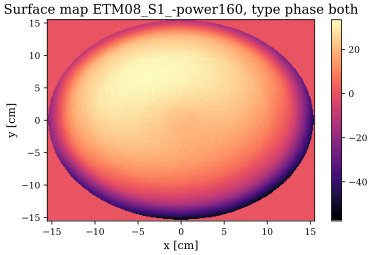

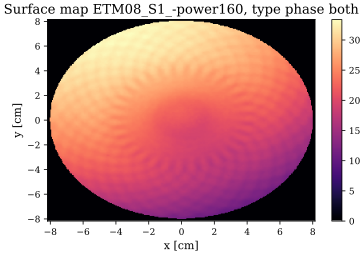

Radius before cropping:  0.16889 m
Radius first cropping:   0.15400 m
Radius second cropping:  0.08020 m


In [9]:
smap2 = deepcopy(smap)
r0 = smap2.find_radius(method = 'max', unit='meters')
# The specified radius of this mirror
smap2.crop(0.154)
r1 = smap2.find_radius(method = 'max', unit='meters')
fig = smap2.plot()

# Radius used in the LIGO figure measurement reports
smap3 = deepcopy(smap)
smap3.crop(0.0802)
r2 = smap3.find_radius(method = 'max', unit='meters')
fig = smap3.plot()

print('Radius before cropping:  {0:.5f} m'.format(r0))
print('Radius first cropping:   {0:.5f} m'.format(r1))
print('Radius second cropping:  {0:.5f} m'.format(r2))

By keeping track of the radii we can see that the algorithm is doing what we want.

## Centering the map

Centering the map is very useful. Here, the origin (0,0) is defined as the place where the beam is supposed to hit the mirror, and this can be offset from the actual mirror center by setting the attribute `surfacemap.xyOffet`. We test this here:

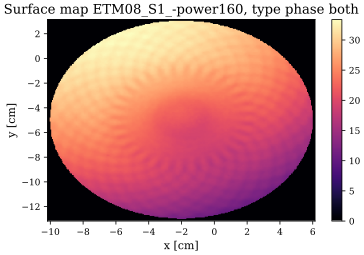

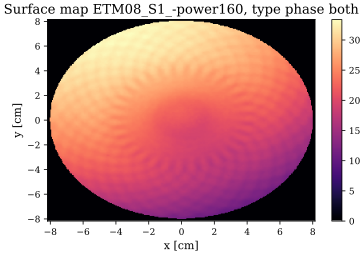

First center  (x, y) [points]: (254.441, 329.369), first xy-offset  [m]: (0.020,0.050)
Second center (x, y) [points]: (204.441, 204.369), second xy-offset [m]: (0.000,0.000)


In [10]:
smap4 = deepcopy(smap3)
# Setting xy-offset
smap4.xyOffset = (0.02,0.05)
# Storing center and xyoffset for printing
xy_offset1 = smap4.xyOffset
center1 = smap4.center
# Plotting, center should be at (x,y) = (-0.02, -0.05) m.
smap4.plot()

# And now we recentering.
smap4.recenter()
# Storing values for printing
xy_offset2 = smap4.xyOffset
center2 = smap4.center
# Plotting, center should be at (x,y) = (0,0) m
smap4.plot()

print(('First center  (x, y) [points]: ({0[0]:.3f}, {0[1]:.3f}), ' +
      'first xy-offset  [m]: ({1[0]:.3f},{1[1]:.3f})').format(center1,xy_offset1))

print(('Second center (x, y) [points]: ({0[0]:.3f}, {0[1]:.3f}), ' +
      'second xy-offset [m]: ({1[0]:.3f},{1[1]:.3f})').format(center2,xy_offset2))

We see that setting the xy-offset shifts the origin of the map, i.e., where the beam is supposed to hit the map. We can also see that the `surfacemap.center` is specified in data points, while xy-offset is specified in meters. To get the center in meters, measured from th lower left corner of mirror map above, we can multiply with the attribute `surfacemap.step_size`: 

In [11]:
center = (smap4.center[0]*smap4.step_size[0], smap4.center[1]*smap4.step_size[1])
print('Center (x,y): ({0[0]:.5f}, {0[1]:.5f}) m'.format(center))

Center (x,y): (0.08178, 0.08175) m


## Preprocessing a phase map with Zernike-polynomials

Without weights, or with uniform weights, we take the whole mirror surface into account. The quickest way to do this is by convolving the mirror surface with Zernike-polynomials to get the amplitudes, and then remove the Zernike polynomials with the corresponding amplitudes from the map. We can chose which Zernike-polynomials we want to remove from the mirror map.

### Removing radius of curvature by using the Z(2,0) mode

The method `surfacemap.remove_curvature()` returns and stores the information about what was removed. The Zernike-polynomial is also converted into an equivalent radius of curvature. This is an approximation, since Z(2,0) actually is parabolic, but for the large radii of curvatures used in the arm cavities of LIGO, the approximation is valid.

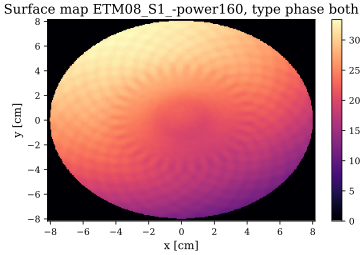

Returned removed values:
Radius of curvature: -4.04e+08 m
Zernike polynomial: {'02': (0, 2, -0.00398168007798258)}

Stored removed values:
Radius of curvature: -4.04e+08 m
Zernike polynomial: {'02': (0, 2, -0.00398168007798258)}


In [12]:
smap5 = deepcopy(smap4)
Rc, znm = smap5.remove_curvature(method='zernike', zModes = 'defocus')

fig5 = smap5.plot()
print('Returned removed values:')
print('Radius of curvature: {0:.2e} m'.format(Rc))
print('Zernike polynomial: {0}'.format(znm))
print()
print('Stored removed values:')
print('Radius of curvature: {0:.2e} m'.format(smap5.RcRemoved))
print('Zernike polynomial: {0}'.format(smap5.zernikeRemoved))

We see above from the data printed to screen that the removed values are both returned and stored in the `surfacemap`-object. Note that barely nothing was removed. This map contains very little curvature as it has already been removed by LIGO.  

### Removing astigmatism using Zernike-polynomials

We could also remove the astigmatism of the mirror map by convolving with the two Zernike-polynomials Z(-2,2) and Z(2,2). We use the same method, but now using `zModes = 'astigmatism'`.

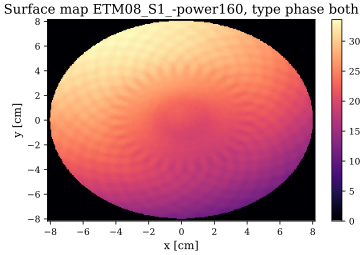

Returned removed values:
Radius of curvature (x,y): (1.24e+07, -1.24e+07) m
Zernike polynomial: {'-22': (-2, 2, 0.2593080742664192), '22': (2, 2, 0.020009852277488374)}

Stored removed values:
Radius of curvature (x,y): (1.24e+07, -1.24e+07) m
Zernike polynomial: {'-22': (-2, 2, 0.2593080742664192), '22': (2, 2, 0.020009852277488374)}


In [13]:
smap6 = deepcopy(smap4)
Rc, znm = smap6.remove_curvature(method='zernike', zModes = 'astigmatism')
fig6 = smap6.plot()

print('Returned removed values:')
print('Radius of curvature (x,y): ({0[0]:.2e}, {0[1]:.2e}) m'.format(Rc))
print('Zernike polynomial: {0}'.format(znm))
print()
print('Stored removed values:')
print('Radius of curvature (x,y): ({0[0]:.2e}, {0[1]:.2e}) m'.format(smap6.RcRemoved))
print('Zernike polynomial: {0}'.format(smap6.zernikeRemoved))

This yields different radii of curvature for x an y, as we expected for astigmatism. Also in this case we can see that not much astigmatism was in the mirror map. 

### Removing both defocus and astigmatism

We could also remove both the defocus and the astigmatism at once by using:

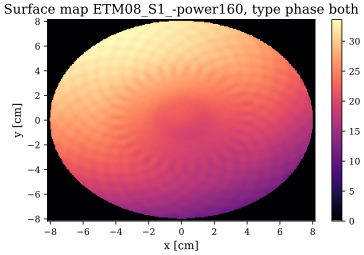

Returned removed values:
Radius of curvature (x,y): (1.28e+07, -1.20e+07) m
Zernike polynomial: {'-22': (-2, 2, 0.2593080742664192), '02': (0, 2, -0.00398168007798258), '22': (2, 2, 0.020009852277488374)}

Stored removed values:
Radius of curvature (x,y): (1.28e+07, -1.20e+07) m
Zernike polynomial: {'-22': (-2, 2, 0.2593080742664192), '02': (0, 2, -0.00398168007798258), '22': (2, 2, 0.020009852277488374)}


In [14]:
smap7 = deepcopy(smap4)
Rc, znm = smap7.remove_curvature(method='zernike', zModes = 'all')
smap7.plot()

print('Returned removed values:')
print('Radius of curvature (x,y): ({0[0]:.2e}, {0[1]:.2e}) m'.format(Rc))
print('Zernike polynomial: {0}'.format(znm))
print()
print('Stored removed values:')
print('Radius of curvature (x,y): ({0[0]:.2e}, {0[1]:.2e}) m'.format(smap7.RcRemoved))
print('Zernike polynomial: {0}'.format(smap7.zernikeRemoved))

### Removing z-offset

With the curvatures removed, we move on to remove the offset in z-direction by convolving the mirror surface with the Zernike-polynomial Z(0,0) and then subtracting this polynomial with the obtained amplitude. We do this by calling the method `surfacemap.removeOffset()` without an input argument. 

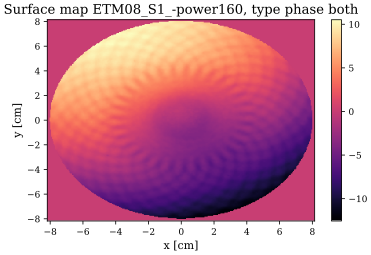

Returned removed values:
Offset: 23.08 nm

Stored removed values:
Zernike polynomials: {'-22': (-2, 2, 0.2593080742664192), '02': (0, 2, -0.00398168007798258), '22': (2, 2, 0.020009852277488374), '00': (0, 0, 23.075620778880158)}


In [15]:
smap8 = deepcopy(smap7)
zOff = smap8.removeOffset()
fig = smap8.plot()

print('Returned removed values:')
print('Offset: {0:.2f} nm'.format(zOff))
print()
print('Stored removed values:')
print('Zernike polynomials: {0}'.format(smap8.zernikeRemoved))

We can see that another Zernike polynomial was added to the dictionary `surfacemap.zernikeRemoved`, the mode Z(0,0).

### Removing tilts

To remove tilts from the mirror map we use convolve the map with the Zernike-polynomials Z(-1,1) and Z(1,1), and removes the polynomials with the obtained amplitudes.

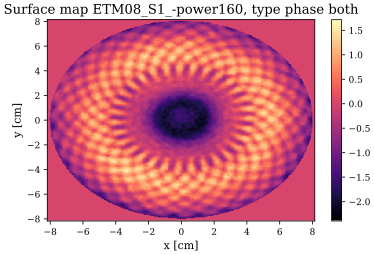

Returned removed values:
Tilt around the y-axis (xbeta): -6.13e-08 rad
Tilt around the x-axis (ybeta): 1.26e-07 rad
Zernike polynomial: [10.090977330306881, -4.918752527964113]

Stored removed values:
Tilts removed (xbeta, ybeta): (-6.13e-08, 1.26e-07) rad
Zernike polynomial: {'-22': (-2, 2, 0.2593080742664192), '02': (0, 2, -0.00398168007798258), '22': (2, 2, 0.020009852277488374), '00': (0, 0, 23.075620778880158), '-11': (-1, 1, 10.090977330306881), '11': (1, 1, -4.918752527964113)}


In [16]:
smap9 = deepcopy(smap8)

A1,xbeta,ybeta = smap9.rmTilt(method='zernike')
fig = smap9.plot()

print('Returned removed values:')
print('Tilt around the y-axis (xbeta): {0:.2e} rad'.format(xbeta))
print('Tilt around the x-axis (ybeta): {0:.2e} rad'.format(ybeta))
print('Zernike polynomial: {0}'.format(A1))
print()
print('Stored removed values:')
print('Tilts removed (xbeta, ybeta): ({0[0]:.2e}, {0[1]:.2e}) rad'.format(smap9.betaRemoved))
print('Zernike polynomial: {0}'.format(smap9.zernikeRemoved))

We can see that we got two new entries in the list of removed Zernike-polynomials, as well as a new tuple, `surfacemap.betaRemoved`, containing the tilts in radians. Be aware that `xbeta` is a rotation about the y-axis, and `ybeta` is a rotation about the x-axis. The pre-processing of our phase map is now done. And the result is very similar to the result in LIGO's figure measurement report.

## Processing map by fitting surfaces

Gaussian weighting can be used to make the center of the mirror more important.

### Without weighting

#### Removing curvature

Fitting a sphere to the mirror surface, and converts to the equivalent Zernike(2,0) amplitude. 

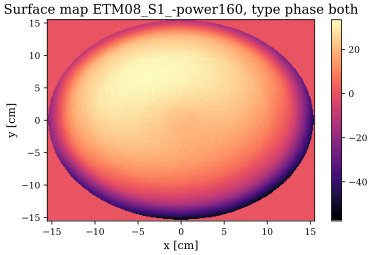

Curvature removed
 Removed Rc = -1.75e+05 m
 or
 Z(n=2,m=0) amplitude A20 = -40.70 nm


In [17]:
smap10 = deepcopy(smap2)
Rc, zOff, A20 = smap.remove_curvature(method='sphere')
fig10 = smap10.plot()
print('Curvature removed')
print(' Removed Rc = {0:.2e} m'.format(Rc) )
print(' or')
print(' Z(n=2,m=0) amplitude A20 = {0:.2f} nm'.format(A20))

We see that there is not much curvature in the map. 

#### Removing z-offset

Fitting flat surface to the mirror map, and subtracting the fitted surface.

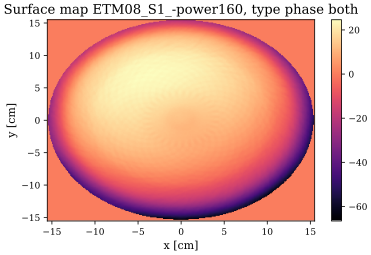

Offset removed
 Removed z-offset (A00) = 8.837 nm


In [18]:
smap11 = deepcopy(smap10)
zOff = smap11.removeOffset()
fig11 = smap11.plot()
print('Offset removed')
print(' Removed z-offset (A00) = {0:.3f} nm'.format(zOff))

#### Removing tilts

Fitting tilted surface to the map, and subtracting the fitted surface.

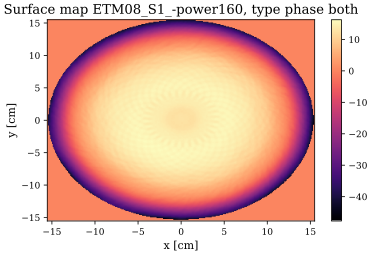

Tilted surface removed:
 xbeta    = -6.07e-08 rad
 ybeta    = 1.30e-07 rad
 z-offset = 8.17e-05 nm
Equivalent Zernike amplitudes:
 A(1,-1) = 20.06 nm
 A(1, 1) = -9.34 nm


In [19]:
smap12 = deepcopy(smap11)
A1,xbeta,ybeta,zOff = smap12.rmTilt(method='fitSurf')
fig12 = smap12.plot()
print('Tilted surface removed:')
print(' xbeta    = {:.2e} rad'.format(xbeta))
print(' ybeta    = {:.2e} rad'.format(ybeta))
print(' z-offset = {:.2e} nm'.format(zOff))
print('Equivalent Zernike amplitudes:')
print(' A(1,-1) = {:.2f} nm'.format(A1[0]))
print(' A(1, 1) = {:.2f} nm'.format(A1[1]))

### With Gaussian weights

Using Gaussian weights with $w=0.062$, i.e., the spot size at the LIGO ETM mirrors.

#### Removing sphere

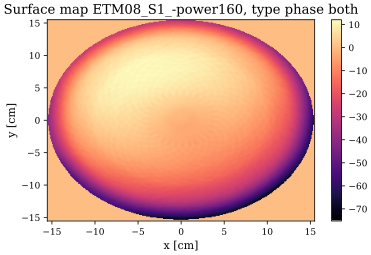

Curvature removed
 Removed Rc = -2112680.83 m
 or
 Z(n=2,m=0) amplitude A20 = -2.79 nm


In [20]:
smap13 = deepcopy(smap2)
w = 0.062
Rc, zOff, A20 = smap13.remove_curvature(method='sphere', w=w)
smap13.plot()
print('Curvature removed')
print(' Removed Rc = {0:.2f} m'.format(Rc) )
print(' or')
print(' Z(n=2,m=0) amplitude A20 = {0:.2f} nm'.format(A20))

#### Removing z-offset

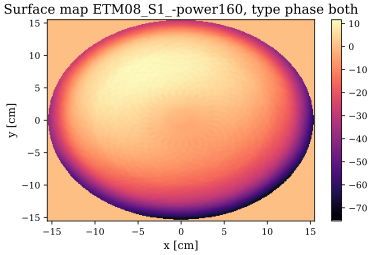

Offset removed
 Removed z-offset (A00) = 0.456 nm


In [21]:
smap14 = deepcopy(smap13)
zOff = smap14.removeOffset(w)
smap14.plot()
print('Offset removed')
print(' Removed z-offset (A00) = {0:.3f} nm'.format(zOff))

#### Removing tilts

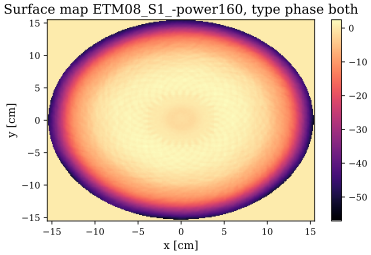

Tilted surface removed:
 xbeta    = -6.15e-08 rad
 ybeta    = 1.26e-07 rad
 z-offset = -4.93e-01 nm
Equivalent Zernike amplitudes:
 A(1,-1) = 19.35 nm
 A(1, 1) = -9.47 nm


In [22]:
smap15 = deepcopy(smap14)
A1,xbeta,ybeta,zOff = smap15.rmTilt(method='fitSurf', w=w)
smap15.plot()
print('Tilted surface removed:')
print(' xbeta    = {:.2e} rad'.format(xbeta))
print(' ybeta    = {:.2e} rad'.format(ybeta))
print(' z-offset = {:.2e} nm'.format(zOff))
print('Equivalent Zernike amplitudes:')
print(' A(1,-1) = {:.2f} nm'.format(A1[0]))
print(' A(1, 1) = {:.2f} nm'.format(A1[1]))

# Automatic preparation

To prepare a map a bit quicker you can call `surfacemap.preparePhaseMap()`, which calls the methods used above in the same order. But there are three input parameters that can be set.

* First, and most important, the weighting parameter `w`. If not set (or set to `None`, which is default), the map is convolved with Zernike-polynomials, as in section 2.2. above. If `w` is set, surfaces are fitted to the map instead by using Gaussian weighting with the radius specified by `w`, as in section 2.3.2. above.
* `xyOffset` should be set if the beam spot is not at the mirror center. This does not affect the preprocessing, it just offsets the origin of the mirror afterwards. The default is `None`. If you want to use this parameter, use a tuple with offsets (x,y) in meters.
* `verbose` should be set to `True` if we want extra information about the process (default is `False`).

We start by reading in a map.

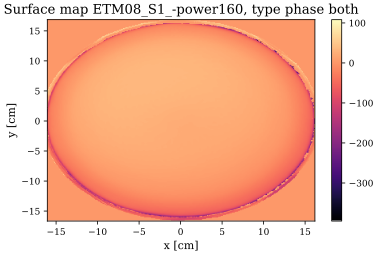

In [23]:
smap16 = read_map('ETM08_S1_-power160.dat', mapFormat='metroPro')
fig16 = smap16.plot()

## Cropping the map

Cropping without a specified radius is performed in `surfacemap.preparePhaseMap()`, but all of the rough edge is generally not removed. The cropping algorithm looks for the NaN element closest to the mirror center, and removes everything at this radius and further away from the center. However, it is generally better to remove some more, especially is we do not use weights when processing the phase map. You can see the difference between two differently cropped phase maps in the two figures below.

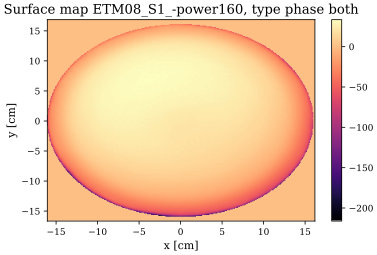

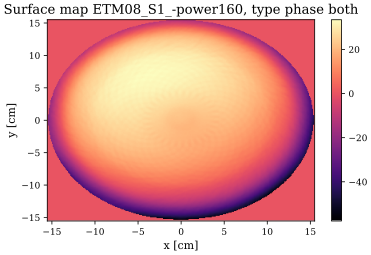

In [24]:
smap17 = deepcopy(smap16)
smap17.crop()
fig17a = smap17.plot()
smap17.crop(0.154)
# Showing unprocessed map
fig17b = smap17.plot()

## Preprocessing without weights (Zernike-polynomials)

To perform the automatic pre-processing we call the method `surfacemap.preparePhaseMap()`. In addition to preparing the phase map it also returns an absorption map that can be applied in FINESSE together with the phase map to make the part of the mirror outside the mirror map absorbing the beam. Since we are not using any weights here, the map will be processed using Zernike polynomials.

In [25]:
smap18 = deepcopy(smap17)
amap = smap18.preparePhaseMap(w=None,xyOffset=None,verbose=True)

--------------------------------------------------
Preparing phase map for Finesse...
--------------------------------------------------
 No weighting used
 (rms, avg) = (2.131e+01, 4.356e-03) nm
--------------------------------------------------
 Centering...
  New center (x0, y0) = (388.45, 388.38)
 Cropping map...
  Size (rows, cols): (777, 777) ---> (777, 777)
  New center (x0, y0) = (388.45, 388.40)
  (rms, avg) = (2.131e+01, 4.357e-03) nm
 Removing curvatures...
  Removed Z20 with amplitude A20 = -25.38 nm
  Equivalent Rc = -233638.77 m
  (rms, avg) = (1.547e+01, 4.357e-03) nm
 Removing offset...
  Removed Z00 with amplitude A00 = 8.84 nm
  (rms, avg) = (1.270e+01, 4.096e-11) nm
 Removing tilts...
  Removed Z1-1 with amplitude A1-1 = 20.05 nm
  Removed Z11 with amplitude A11 = -9.34 nm
  Equivalent tilts in radians: 
   xbeta = -6.06e-08 rad
   ybeta = 1.30e-07 rad
  (rms, avg) = (6.240e+00, -3.378e-11) nm
 Creating aperture map...
  Aperture map created.
 Writing maps to file...

Plotting both the processed phase map, and the created absorption map.

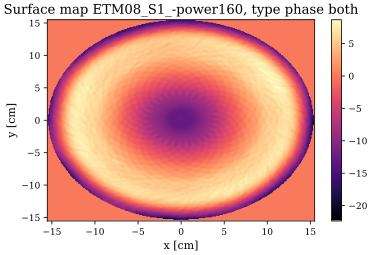

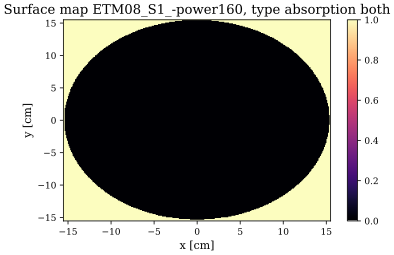

In [26]:
fig18a = smap18.plot()
fig18b = amap.plot()

## Preprocessing with Gaussian weights

Since the spot radius at the ETM in LIGO is 6.2 cm, we use a Gaussian weighting function with radius 6.3 cm to make the area mostly seen by the beam as smooth as possible. 

In [27]:
smap19 = deepcopy(smap17)
amap2 = smap19.preparePhaseMap(w=0.062, verbose=True)

--------------------------------------------------
Preparing phase map for Finesse...
--------------------------------------------------
 Gaussian weights used with radius: 6.20 cm
 (rms, avg) = (2.364e+01, 1.754e-02) nm
--------------------------------------------------
 Centering...
  New center (x0, y0) = (388.45, 388.38)
 Cropping map...
  Size (rows, cols): (777, 777) ---> (777, 777)
  New center (x0, y0) = (388.45, 388.40)
  (rms, avg) = (2.364e+01, 1.754e-02) nm
 Removing curvatures...
  Removed Rc = -2167839.39 m
  Equivalent Z(n=2,m=0) amplitude A20 = -2.79 nm
  (rms, avg) = (4.461e+00, 2.550e-03) nm
 Removing offset...
  Removed z-offset (A00) = 0.491 nm
  (rms, avg) = (4.434e+00, 4.727e-11) nm
 Removing tilts...
  Tilted surface removed:
   xbeta    = -6.15e-08 rad
   ybeta    = 1.26e-07 rad
   z-offset = -4.93e-01 nm
  Equivalent Zernike amplitudes:
   A(1,-1) = 19.35 nm
   A(1, 1) = -9.47 nm
  (rms, avg) = (1.153e+00, 2.556e-03) nm
 Equivalent Z00 amplitude from accumulate

Plotting the prepared phase map as well as the generated absorption map.

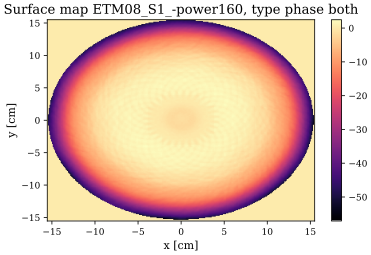

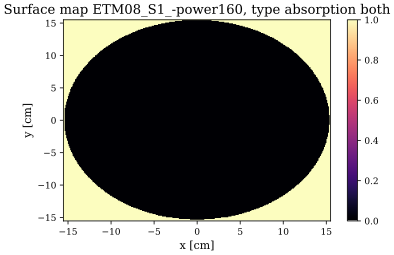

In [28]:
fig19a = smap19.plot()
fig19b = amap2.plot()